In [1]:
import pandas as pd
import pyrsm as rsm

rsm.__version__ # should be 0.9.26 or higher

'0.9.26'

In [2]:
# run the code below to ensure you have the latest version
# %pip install --user pyrsm --upgrade

In [3]:
## setup pyrsm for autoreload when you edit code and save
%reload_ext autoreload
%autoreload 2
%aimport pyrsm

In [4]:
# load data
dvd = pd.read_parquet("data/dvd.parquet")
dvd

,buy,coupon,purch,last
0,yes,5,2,5
1,no,5,2,33
2,no,4,11,11
3,no,3,5,25
4,no,1,1,15
...,...,...,...,...
19995,yes,4,9,23
19996,no,4,2,25
19997,no,1,10,11
19998,no,4,1,1


In [5]:
# review the data
rsm.md("data/dvd_description.md")

## DVD

### Description

The data contain information on a sample of 20,000 customers who received an "instant coupon." The value of the coupon was varied between \$1 and \$5 and randomly assigned to the selected customers.

Our interest is in estimating the effect of the coupon on purchase of a newly released DVD. We will also investigate the role of two additional variables: `purch` is a measure of frequency of purchase and `last` is a measure of the recency of the last purchase by a customer. These measures are often used in practice to predict response rates.

Customers who received the coupon and purchased the DVD are identified in the data by the variable `buy`. Because the variable we want to predict is binary (`buy` = `yes` if the customer purchased the DVD and `buy` = `no` if she did not), logistic regression is appropriate.

### Variables

* buy = `yes` if the customer purchased the DVD and `no` if she did not
* coupon = value of an "instant coupon" in dollars. the value varies between \$1 and \$5
* coupon = value of an "instant coupon" in dollars. the value varies between \$1 and \$5
* purch = number of purchases by the customer in the past year
* last = days since the last purchase by the customer

### Source

The dataset `dvd.rda` is available for download from <a href = "https://vnijs.github.io/radiant/examples/dvd.rda" target="_blank">GitHub</a>.

Estimate a logistic regression model with `coupon`, `purch`, and `last` as the explanatory variables

Calculate model fit measures, variable, importance, and prediction plots

In [6]:
dvd.buy.value_counts(dropna=False)

buy
no     14754
yes     5246
Name: count, dtype: int64

In [7]:
lr = rsm.model.logistic(
    {"dvd": dvd},
    rvar="buy",
    lev="yes",
    evar=["coupon", "purch", "last"]
)
lr.summary()

Logistic regression (GLM)
Data                 : dvd
Response variable    : buy
Level                : yes
Explanatory variables: coupon, purch, last
Null hyp.: There is no effect of x on buy
Alt. hyp.: There is an effect of x on buy

              OR     OR%  coefficient  std.error  z.value p.value     
Intercept  0.048  -95.2%        -3.04      0.063  -48.136  < .001  ***
coupon     2.169  116.9%         0.77      0.015   51.240  < .001  ***
purch      1.095    9.5%         0.09      0.005   17.879  < .001  ***
last       0.933   -6.7%        -0.07      0.002  -35.388  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.208
Pseudo R-squared (McFadden adjusted): 0.208
Area under the RO Curve (AUC): 0.803
Log-likelihood: -9110.529, AIC: 18229.058, BIC: 18260.672
Chi-squared: 4796.899, df(3), p.value < 0.001 
Nr obs: 20,000


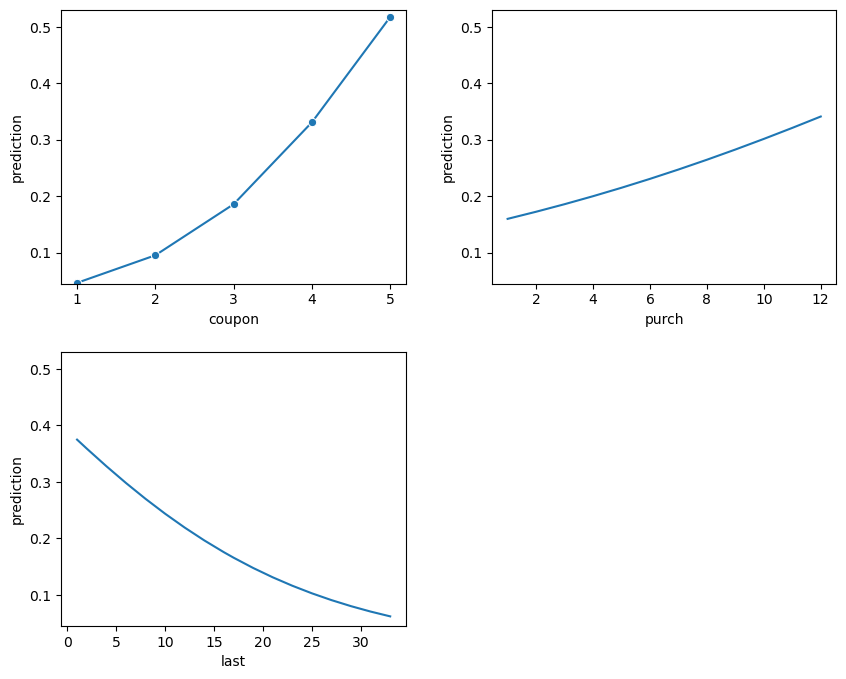

In [8]:
lr.plot("pred")

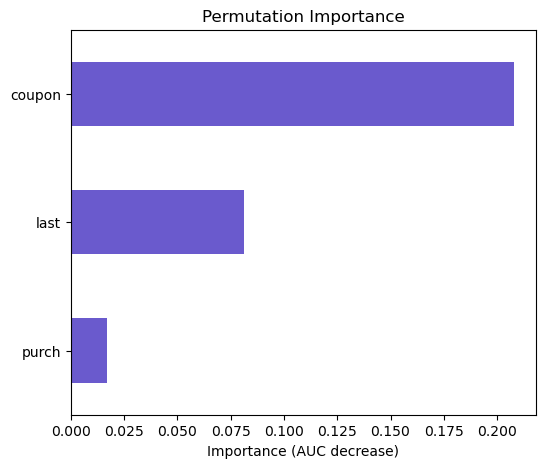

In [9]:
lr.plot("vimp")

In [10]:
lr.coef.round(3)

,index,OR,OR%,coefficient,std.error,z.value,p.value,
0,Intercept,0.048,-95.206,-3.038,0.063,-48.136,0.0,***
1,coupon,2.169,116.866,0.774,0.015,51.240,0.0,***
2,purch,1.095,9.539,0.091,0.005,17.879,0.0,***
3,last,0.933,-6.678,-0.069,0.002,-35.388,0.0,***


In [11]:
# test if purch and last (together) significantly improve the model
lr.summary(main=False, fit=False, test=["purch", "last"])


Model 1: buy ~ coupon
Model 2: buy ~ coupon + purch + last
Pseudo R-squared, Model 1 vs 2: 0.134 vs 0.208
Chi-squared: 1718.203 df (2), p.value < .001


In [12]:
# test if purch and last (together) significantly improve the model
lr.summary(test=["purch", "last"])

Logistic regression (GLM)
Data                 : dvd
Response variable    : buy
Level                : yes
Explanatory variables: coupon, purch, last
Null hyp.: There is no effect of x on buy
Alt. hyp.: There is an effect of x on buy

              OR     OR%  coefficient  std.error  z.value p.value     
Intercept  0.048  -95.2%        -3.04      0.063  -48.136  < .001  ***
coupon     2.169  116.9%         0.77      0.015   51.240  < .001  ***
purch      1.095    9.5%         0.09      0.005   17.879  < .001  ***
last       0.933   -6.7%        -0.07      0.002  -35.388  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.208
Pseudo R-squared (McFadden adjusted): 0.208
Area under the RO Curve (AUC): 0.803
Log-likelihood: -9110.529, AIC: 18229.058, BIC: 18260.672
Chi-squared: 4796.899, df(3), p.value < 0.001 
Nr obs: 20,000

Model 1: buy ~ coupon
Model 2: buy ~ coupon + purch + last
Pseudo R-squared, Model 1 vs 2: 0.134 vs 0.208
Ch